# Extract Result
## Competency Assessment 

---

# 0. The Obligatory Part

In [49]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data Structure

In [50]:
new_employee_path = "./data/fixed_data_employee.csv"
new_task_path = "./data/fixed_data_task.csv"

In [51]:
data_path = {0.25: './output_VM/1_gap_0.25/',   # 1
             0.05: './output_VM/2_gap_0.05/',	# 2
			 0.025: './output_VM/3_gap_0.025/',	# 3
}

## 1.1. Pre-Processing: Employee Data


In [52]:
# Read data
employee_skills_df = pd.read_csv(new_employee_path, index_col="employee_id")
employee_skills_df.drop(columns=["No", "Role"], inplace=True, errors="ignore")

employees = employee_skills_df.index.tolist()
skills_name = employee_skills_df.columns[1:].tolist()

employee_skills_df

,Mathematics.Linear Algebra,Mathematics.Differential Equations,Mathematics.Optimization Technique,Mathematics.Calculus,Mathematics.Combinatorics & Graph,Statistics & Probabilities.Statistics,Statistics & Probabilities.Probability & Sampling,Statistics & Probabilities.Bayessian Method,Statistics & Probabilities.Hypothesis Testing,Statistics & Probabilities.A/B Testing,Statistics & Probabilities.CUPED,Data Structures & Algorithms.Complexity Analysis,Data Structures & Algorithms.Programming,Data Structures & Algorithms.Data Structures,Data Structures & Algorithms.Algorithms,Data Structures & Algorithms.Advanced Algorithms,Data Structures & Algorithms.SQL,Data Structures & Algorithms.Shell / Bash Scripting,"Econometrics, Data Analysis, and Data Visualization.Data Preprocessing & EDA","Econometrics, Data Analysis, and Data Visualization.Data Viz & Storytelling","Econometrics, Data Analysis, and Data Visualization.Econometrics","Econometrics, Data Analysis, and Data Visualization.Regression Analysis","Econometrics, Data Analysis, and Data Visualization.Time Series Analysis","Econometrics, Data Analysis, and Data Visualization.Correlation Analysis","Econometrics, Data Analysis, and Data Visualization.Causal Analysis","Econometrics, Data Analysis, and Data Visualization.Dimensional Reduction (PCA)",Machine Learning.Supervised ML,Machine Learning.Unsupervised ML,Machine Learning.Reinforcemetn Learning,Machine Learning.Feature Engineering,Machine Learning.Ensemble Method,Deep Learning.Neural Network & DL,Deep Learning.NLP,Deep Learning.GAN,Deep Learning.Generative AI,Deep Learning.Computer VIsion,Deep Learning.Audio & Speech Processing,Deep Learning.Transfer Learning,Deep Learning.Sequence Modelling,Deep Learning.Accelerated & Parallel Computing,Deep Learning.Edge Computing,Data & Cloud Engineering.Relational DB,Data & Cloud Engineering.Non Relational DB,Data & Cloud Engineering.Devops & CI/CD,Data & Cloud Engineering.Data Pipeline,Data & Cloud Engineering.Data Collection,Data & Cloud Engineering.Data Wrangling,Data & Cloud Engineering.Batch Processing,Data & Cloud Engineering.Stream Processing,Data & Cloud Engineering.Big Data Tech,Data & Cloud Engineering.Data Warehousing,Data & Cloud Engineering.ORM & REST API,Data & Cloud Engineering.Microservices & Containerization,Data & Cloud Engineering.Cloud Native,Data & Cloud Engineering.Cloud & Serverless Architecture,Data & Cloud Engineering.Data Security & Privacy,Data & Cloud Engineering.Distributed Systems,"Data & Cloud Engineering.Monitoring, Logging, Alerting",MLOPS.ML Lifecycle,MLOPS.ML Model Pipeline,MLOPS.Model Versioning,MLOPS.Automated Testing & Validation,MLOPS.Scalable Model Training,"MLOPS.Model Deployment, Monitoring, Logging",MLOPS.Ethical AI & Bias Mitigation
employee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Talent 1,1,1,2,1,2,3,3,2,2,2,1,2,2,2,2,1,3,2,3,4,3,2,2.0,2,2,2,3,2,1,2,1,1,2,1,2,1,1,1,1,1,1,3,3,2,2,2,2,2,2,2,2,2,1,1,2,1,1,1,2,1,1,1,1,1,2
Talent 2,4,4,4,4,3,5,4,3,3,3,1,4,3,3,3,1,3,3,3,3,3,3,3.0,3,3,3,3,3,2,3,2,3,3,2,3,2,3,2,2,2,2,4,3,3,2,2,2,1,1,1,2,2,2,2,2,3,2,1,1,1,1,1,1,1,1
Talent 3,3,2,2,3,2,3,3,2,2,3,2,2,3,3,3,3,4,3,3,3,2,2,3.0,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,2,3,3,2
Talent 4,3,2,3,2,3,4,3,2,4,2,2,2,4,4,3,3,4,3,4,4,3,4,3.0,3,3,3,4,4,3,4,3,3,4,2,3,2,2,3,2,2,2,4,2,2,3,4,3,1,1,1,1,1,1,2,2,3,1,1,2,2,2,2,2,2,2
Talent 5,2,1,3,1,1,1,2,1,1,2,1,3,5,5,5,3,5,4,3,4,1,1,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,2,1,1,2,2,1,1,3,2,5,2,1,2,1
Talent 6,3,3,3,2,2,3,3,3,3,2,2,3,3,3,3,2,4,4,4,3,2,4,NaN,3,2,3,4,3,2,3,2,3,3,2,2,2,2,2,2,2,2,4,4,3,3,3,3,3,2,2,3,4,4,4,4,2,2,3,3,3,2,3,2,3,2
Talent 7,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,4,4,4.0,5,4,4,5,5,3,4,4,4,4,3,4,4,3,4,4,4,4,3,3,3,3,3,4,3,3,4,3,3,3,3,3,3,3,3,4,4,3,3,4,4,3
Talent 8,5,5,5,5,4,5,5,4,4,4,4,3,5,5,5,5,5,5,5,5,4,5,5.0,5,4,5,5,5,4,5,5,5,5,5,5,5,4,5,4,5,5,5,4,3,5,5,5,5,5,4,4,5,5,5,5,3,4,4,4,5,4,5,4,5,3
Talent 9,2,1,2,1,1,2,1,1,1,1,1,4,4

## 1.2. Pre-Processing: Task Data


In [53]:
task_df = pd.read_csv(new_task_path, index_col="task_id")

tasks = task_df.index.tolist()
company_names = list(set(task_df["project_id"]))
story_points = task_df["story_points"].to_dict()

task_df

,project_id,story_points,Mathematics.Linear Algebra,Mathematics.Differential Equations,Mathematics.Optimization Technique,Mathematics.Calculus,Mathematics.Combinatorics & Graph,Statistics & Probabilities.Statistics,Statistics & Probabilities.Probability & Sampling,Statistics & Probabilities.Bayessian Method,Statistics & Probabilities.Hypothesis Testing,Statistics & Probabilities.A/B Testing,Statistics & Probabilities.CUPED,Data Structures & Algorithms.Complexity Analysis,Data Structures & Algorithms.Programming,Data Structures & Algorithms.Data Structures,Data Structures & Algorithms.Algorithms,Data Structures & Algorithms.Advanced Algorithms,Data Structures & Algorithms.SQL,Data Structures & Algorithms.Shell / Bash Scripting,"Econometrics, Data Analysis, and Data Visualization.Data Preprocessing & EDA","Econometrics, Data Analysis, and Data Visualization.Data Viz & Storytelling","Econometrics, Data Analysis, and Data Visualization.Econometrics","Econometrics, Data Analysis, and Data Visualization.Regression Analysis","Econometrics, Data Analysis, and Data Visualization.Time Series Analysis","Econometrics, Data Analysis, and Data Visualization.Correlation Analysis","Econometrics, Data Analysis, and Data Visualization.Causal Analysis","Econometrics, Data Analysis, and Data Visualization.Dimensional Reduction (PCA)",Machine Learning.Supervised ML,Machine Learning.Unsupervised ML,Machine Learning.Reinforcemetn Learning,Machine Learning.Feature Engineering,Machine Learning.Ensemble Method,Deep Learning.Neural Network & DL,Deep Learning.NLP,Deep Learning.GAN,Deep Learning.Generative AI,Deep Learning.Computer VIsion,Deep Learning.Audio & Speech Processing,Deep Learning.Transfer Learning,Deep Learning.Sequence Modelling,Deep Learning.Accelerated & Parallel Computing,Deep Learning.Edge Computing,Data & Cloud Engineering.Relational DB,Data & Cloud Engineering.Non Relational DB,Data & Cloud Engineering.Devops & CI/CD,Data & Cloud Engineering.Data Pipeline,Data & Cloud Engineering.Data Collection,Data & Cloud Engineering.Data Wrangling,Data & Cloud Engineering.Batch Processing,Data & Cloud Engineering.Stream Processing,Data & Cloud Engineering.Big Data Tech,Data & Cloud Engineering.Data Warehousing,Data & Cloud Engineering.ORM & REST API,Data & Cloud Engineering.Microservices & Containerization,Data & Cloud Engineering.Cloud Native,Data & Cloud Engineering.Cloud & Serverless Architecture,Data & Cloud Engineering.Data Security & Privacy,Data & Cloud Engineering.Distributed Systems,"Data & Cloud Engineering.Monitoring, Logging, Alerting",MLOPS.ML Lifecycle,MLOPS.ML Model Pipeline,MLOPS.Model Versioning,MLOPS.Automated Testing & Validation,MLOPS.Scalable Model Training,"MLOPS.Model Deployment, Monitoring, Logging",MLOPS.Ethical AI & Bias Mitigation
task_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
T1,P5,8,2,1,1,0,1,4,2,3,1,5,2,3,1,3,0,4,0,0,2,2,5,0,3,5,2,2,4,5,2,2,1,2,5,0,5,0,4,1,2,5,1,5,1,1,4,1,1,3,0,2,5,5,4,1,4,5,3,0,2,2,2,2,2,0,0
T2,P1,1,3,2,2,3,2,5,2,3,0,0,2,3,4,4,5,3,0,2,1,0,0,2,3,3,5,1,2,3,1,0,2,1,1,2,3,5,4,5,3,1,0,0,1,3,4,2,1,3,5,4,1,1,5,1,5,4,5,0,1,0,2,0,5,2,5
T3,P5,2,3,5,4,5,5,1,0,5,2,0,1,4,3,2,4,5,2,3,5,5,0,4,2,3,2,2,3,3,3,3,0,4,3,2,3,5,4,3,2,4,5,5,4,5,3,3,5,4,2,5,4,1,4,0,4,5,3,4,4,5,1,4,3,3,3
T4,P1,3,0,3,3,5,4,5,5,2,2,2,2,2,5,3,5,1,3,2,0,5,0,3,3,2,4,0,5,1,5,3,2,4,5,5,1,2,5,1,5,5,2,5,2,5,1,0,3,4,4,2,2,4,1,3,2,2,4,0,1,1,3,5,0,5,0
T5,P2,5,0,2,2,4,4,2,5,0,5,2,2,3,2,0,0,3,3,3,4,0,4,0,3,0,2,5,0,1,5,2,3,5,4,4,4,3,0,0,5,3,2,0,0,4,3,1,4,5,5,1,2,4,2,1,5,2,1,5,4,1,0,4,3,5,4
T6,P2,5,2,0,4,1,0,5,5,1,0,4,5,1,2,5,5,1,4,2,2,4,5,2,3,4,3,3,1,1,3,2,3,5,2,2,3,0,4,4,2,0,0,0,5,4,5,0,1,1,5,3,0,1,4,4,5,5,2,5,1,1,0,3,5,1,3
T7,P5,5,5,5,3,4,1,1,3,0,0,3,2,3,3,1,4,4,3,4,0,0,2,1,5,2,5,0,0,1,0,5,3,3,3,3,3,5,0,0,2,4,4,5,2,4,3,1,1,3,3,0,1,5,2,3,5,2,3,1,4,4,5,3,2,0,1
T8,P5,2,4,3,1,0,2,5,3,5,1,4,1,5,3,4,4,2,0,3,0,5,3,1,2,3,5,3,2,3,2,4,1,1,4,3,5,4,0,1,5,2,1,1,4,1,3,3,0,5,2,4,0,4,1,0,4,5,1,2,1,1,2,2,1,3,4
T9,P2,5,3,2,3,0,2,5,1,0,5,4,4,4,2,5,

## 1.3. Group the task data by company/project


In [54]:
# convert to dictionary each company and its task
company_tasks = {}

for company in company_names:
    company_tasks[company] = task_df[task_df["project_id"] == company].index.tolist()

# sort the company tasks from C1 to C5
company_tasks = dict(sorted(company_tasks.items()))

company_tasks_df = pd.DataFrame.from_dict(company_tasks, orient="index")
company_tasks_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
P1,T2,T4,T14,T21,T26,T29,T30,T36,T38,T40,T41,T54,T55,T66,T74,T75,T87,T105,T107,T112,T121,T122,T128,T129,T138,T148,T149,T159,T171,T174,T179,T189,T195,T204,T206,T210,T222,T226,T230,T233,T238,T239,T244,T248,T250,T251,T252,T257,T258,T266,T269,T273,T275,T290,T292,T294,None,None,None,None,None,None,None,None,None,None
P2,T5,T6,T9,T11,T19,T28,T32,T33,T44,T46,T47,T49,T62,T63,T67,T69,T76,T79,T88,T91,T104,T108,T109,T114,T117,T125,T127,T131,T134,T135,T140,T145,T150,T152,T155,T157,T161,T162,T164,T165,T167,T170,T177,T200,T201,T205,T213,T216,T220,T223,T224,T229,T235,T249,T256,T259,T260,T265,T274,T279,T283,T291,T293,T297,T298,T299
P3,T10,T23,T24,T25,T34,T48,T53,T58,T59,T68,T73,T80,T89,T92,T93,T97,T100,T103,T113,T115,T116,T119,T120,T126,T137,T154,T158,T163,T166,T173,T176,T180,T182,T188,T191,T192,T197,T202,T203,T208,T214,T219,T227,T228,T232,T237,T245,T246,T255,T263,T264,T270,T271,T277,T278,T284,T285,T286,T287,T289,T300,None,None,None,None,None
P4,T15,T20,T35,T37,T39,T43,T56,T57,T61,T70,T81,T82,T84,T85,T86,T94,T95,T96,T98,T99,T101,T102,T106,T118,T123,T124,T136,T146,T151,T156,T160,T184,T185,T186,T190,T196,T199,T212,T215,T217,T225,T231,T240,T247,T253,T254,T261,T262,T267,T272,T281,T295,None,None,None,None,None,None,None,None,None,None,None,None,None,None
P5,T1,T3,T7,T8,T12,T13,T16,T17,T18,T22,T27,T31,T42,T45,T50,T51,T52,T60,T64,T65,T71,T72,T77,T78,T83,T90,T110,T111,T130,T132,T133,T139,T141,T142,T143,T144,T147,T153,T168,T169,T172,T175,T178,T181,T183,T187,T193,T194,T198,T207,T209,T211,T218,T221,T234,T236,T241,T242,T243,T268,T276,T280,T282,T288,T296,None


# 2. Set for Gap 2.5%

Result for the output with gap 2.5%

## 2.1. Data Define

In [55]:
data_result_0_025 = {1: data_path[0.025] + "result_1.csv",
                     2: data_path[0.025] + "result_2.csv",
                     3: data_path[0.025] + "result_3.csv",
                     4: data_path[0.025] + "result_5_MOO_2.csv",}

## 2.2. Objective 1 Result

In [56]:
# Set display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

res1_0_025 = pd.read_csv(data_result_0_025[1])
res1_0_025.set_index("employee")
res1_0_025

,employee,company,assigned_task,sum_sp,wasted_sp,assessment_score
0,Talent 1,"['P4', 'P4']","['T101', 'T199']",11,9,"[-0.02926093514328809, -0.02909890109890109]"
1,Talent 2,['P4'],['T240'],2,18,[-0.019185520361990952]
2,Talent 3,['P2'],['T177'],3,17,[-0.019134615384615382]
3,Talent 4,['P3'],['T228'],1,19,[-0.01656108597285068]
4,Talent 5,"['P1', 'P1', 'P1']","['T21', 'T174', 'T239']",13,7,"[-0.029755872869645334, -0.03243744207599629, ..."
5,Talent 6,"['P2', 'P2', 'P2']","['T162', 'T164', 'T265']",18,2,"[-0.012912087912087911, -0.021632174931667306,..."
6,Talent 7,"['P1', 'P1']","['T66', 'T105']",4,16,"[-0.0033830044301248457, 0.0014792899408283989]"
7,Talent 8,"['P4', 'P4']","['T136', 'T267']",7,13,"[0.01599592460519613, 0.01219512195121952]"
8,Talent 9,['P3'],['T300'],2,18,[-0.017683465959328022]
9,Talent 10,['P3'],['T10'],1,19,[0.01764389456697149]


In [57]:
# Convert the string representations of lists to actual lists of numbers
res1_0_025["assessment_score"] = res1_0_025["assessment_score"].apply(
    lambda x: ast.literal_eval(x)
)

In [58]:
# statistics of the objective

total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in res1_0_025["employee"]))
total_active_sp = sum(value for value in res1_0_025["sum_sp"])
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 109
Total Active Employee		: 109	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



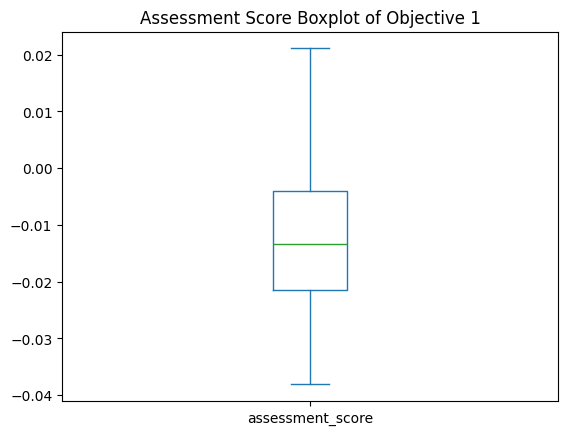

In [59]:
assessment_score_1_0_025 = res1_0_025["assessment_score"].explode().reset_index(drop=True)
assessment_score_1_0_025.plot(kind='box')
plt.title('Assessment Score Boxplot of Objective 1')
plt.show()

## 2.3. Objective 2 Result

In [60]:
# Set display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

res2_0_025 = pd.read_csv(data_result_0_025[2])
res2_0_025.set_index("employee")
res2_0_025

,employee,company,assigned_task,sum_sp,wasted_sp,assessment_score
0,Talent 6,"['P3', 'P3']","['T93', 'T116']",16,4,"[-0.013510848126232742, -0.015484515484515482]"
1,Talent 7,"['P4', 'P4', 'P4', 'P4', 'P4', 'P4', 'P4', 'P4']","['T106', 'T124', 'T151', 'T196', 'T199', 'T240...",20,0,"[0.002210433244916002, 0.00028490028490028103,..."
2,Talent 8,"['P2', 'P2', 'P2', 'P2']","['T67', 'T170', 'T177', 'T291']",20,0,"[0.00909090909090909, 0.010227761065749887, 0...."
3,Talent 10,"['P2', 'P2', 'P2', 'P2', 'P2', 'P2', 'P2']","['T47', 'T200', 'T205', 'T249', 'T259', 'T260'...",20,0,"[0.008938547486033517, 0.012787212787212785, 0..."
4,Talent 11,"['P5', 'P5', 'P5', 'P5']","['T18', 'T72', 'T110', 'T153']",20,0,"[-0.001075847229693383, -0.0024975024975024992..."
5,Talent 12,"['P3', 'P3']","['T154', 'T285']",16,4,"[-0.010961538461538464, -0.010650887573964499]"
6,Talent 13,"['P1', 'P1', 'P1']","['T30', 'T75', 'T179']",19,1,"[-0.009626630679262253, -0.004033771106941837,..."
7,Talent 14,"['P3', 'P3']","['T58', 'T270']",16,4,"[-0.009829059829059836, -0.008763388510223956]"
8,Talent 16,"['P4', 'P4', 'P4', 'P4']","['T57', 'T61', 'T215', 'T261']",20,0,"[-0.0037422037422037433, -0.006713286713286712..."
9,Talent 19,"['P1', 'P1', 'P1', 'P1', 'P1', 'P1', 'P1', 'P1']","['T4', 'T14', 'T40', 'T149', 'T159', 'T174', '...",20,0,"[8.499787505312345e-05, -0.0002714932126696874..."


In [61]:
# Convert the string representations of lists to actual lists of numbers
res2_0_025["assessment_score"] = res2_0_025["assessment_score"].apply(
    lambda x: ast.literal_eval(x)
)

In [62]:
# statistics of the objective

total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in res2_0_025["employee"]))
total_active_sp = sum(value for value in res2_0_025["sum_sp"])
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 109
Total Active Employee		: 64	58.72%
Total Idle Employee		: 45	41.28%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



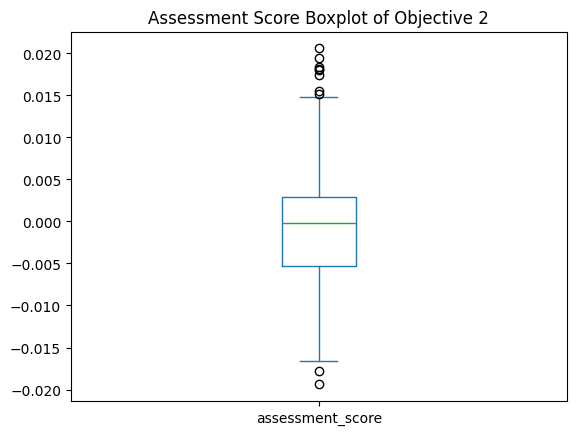

In [63]:
assessment_score_2_0_025 = res2_0_025["assessment_score"].explode().reset_index(drop=True)
assessment_score_2_0_025.plot(kind='box')
plt.title('Assessment Score Boxplot of Objective 2')
plt.show()

## 2.4. Objective 3 Result

In [64]:
# Set display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

res3_0_025 = pd.read_csv(data_result_0_025[3])
res3_0_025.set_index("employee")
res3_0_025.head()

,employee,company,assigned_task,sum_sp,wasted_sp,assessment_score
0,Talent 1,"['P1', 'P1', 'P1', 'P1']","['T75', 'T107', 'T129', 'T239']",11,9,"[-0.027204502814258923, -0.03049613108784706, ..."
1,Talent 2,"['P3', 'P3']","['T92', 'T182']",10,10,"[-0.01748633879781421, -0.016575682382134]"
2,Talent 3,"['P1', 'P1']","['T87', 'T275']",11,9,"[-0.015097945532728143, -0.01630584983878397]"
3,Talent 4,"['P3', 'P3']","['T97', 'T158']",10,10,"[-0.01692307692307692, -0.010063620589936376]"
4,Talent 5,['P1'],['T21'],8,12,[-0.029755872869645334]


In [65]:
# Convert the string representations of lists to actual lists of numbers
res3_0_025["assessment_score"] = res3_0_025["assessment_score"].apply(
    lambda x: ast.literal_eval(x)
)

In [66]:
# statistics of the objective

total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in res3_0_025["employee"]))
total_active_sp = sum(value for value in res3_0_025["sum_sp"])
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 109
Total Active Employee		: 109	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



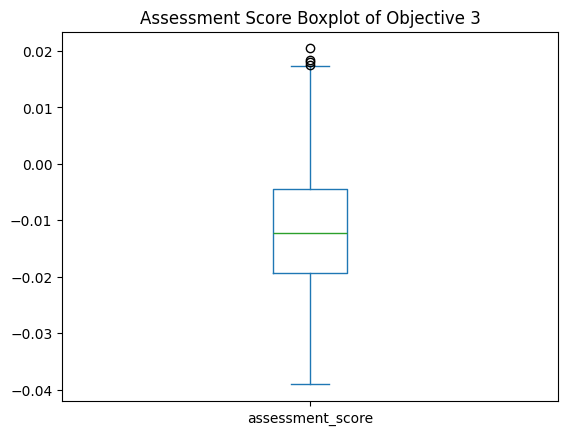

In [67]:
assessment_score_3_0_025 = res3_0_025["assessment_score"].explode().reset_index(drop=True)
assessment_score_3_0_025.plot(kind='box')
plt.title('Assessment Score Boxplot of Objective 3')
plt.show()

## 2.5. MOO Result (Method 2)

In [68]:
# Set display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

res5_0_025 = pd.read_csv(data_result_0_025[4])
res5_0_025.set_index("employee")
res5_0_025.head()

,employee,company,assigned_task,sum_sp,wasted_sp,assessment_score
0,Talent 1,['P3'],['T270'],8,12,[-0.027166504381694268]
1,Talent 2,"['P3', 'P3']","['T97', 'T166']",11,9,"[-0.017692307692307688, -0.017582417582417582]"
2,Talent 3,"['P2', 'P2']","['T201', 'T297']",11,9,"[-0.01773854560739807, -0.011648351648351648]"
3,Talent 4,"['P5', 'P5']","['T153', 'T296']",10,10,"[-0.01749788672865596, -0.011564986737400529]"
4,Talent 5,['P4'],['T39'],8,12,[-0.029608127721335267]


In [69]:
# Convert the string representations of lists to actual lists of numbers
res5_0_025["assessment_score"] = res5_0_025["assessment_score"].apply(
    lambda x: ast.literal_eval(x)
)

In [70]:
# statistics of the objective

total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in res5_0_025["employee"]))
total_active_sp = sum(value for value in res5_0_025["sum_sp"])
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 109
Total Active Employee		: 109	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



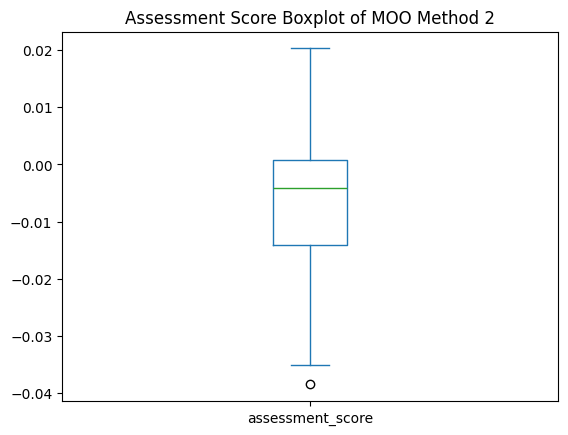

In [71]:
assessment_score_5_0_025 = res5_0_025["assessment_score"].explode().reset_index(drop=True)
assessment_score_5_0_025.plot(kind='box')
plt.title('Assessment Score Boxplot of MOO Method 2')
plt.show()

#  3. Set for Gap 5%

## 3.1. Data Define

In [72]:
data_result_0_05 = {1: data_path[0.05] + "result_1.csv",
                     2: data_path[0.05] + "result_2.csv",
                     3: data_path[0.05] + "result_3.csv",
                     4: data_path[0.05] + "result_5_MOO_2.csv",}

## 3.5. MOO Result (Method 2)

In [73]:
# Set display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

res5_0_05 = pd.read_csv(data_result_0_05[4])
res5_0_05.set_index("employee")
res5_0_05.head()

,employee,company,assigned_task,sum_sp,wasted_sp,assessment_score
0,Talent 1,['P3'],['T270'],8,12,[-0.027166504381694268]
1,Talent 2,"['P3', 'P3']","['T97', 'T166']",11,9,"[-0.017692307692307688, -0.017582417582417582]"
2,Talent 3,"['P2', 'P2']","['T125', 'T297']",11,9,"[-0.019116977696859355, -0.011648351648351648]"
3,Talent 4,"['P5', 'P5']","['T153', 'T296']",10,10,"[-0.01749788672865596, -0.011564986737400529]"
4,Talent 5,['P4'],['T39'],8,12,[-0.029608127721335267]


In [74]:
# Convert the string representations of lists to actual lists of numbers
res5_0_05["assessment_score"] = res5_0_05["assessment_score"].apply(
    lambda x: ast.literal_eval(x)
)

In [75]:
# statistics of the objective

total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in res5_0_05["employee"]))
total_active_sp = sum(value for value in res5_0_05["sum_sp"])
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 109
Total Active Employee		: 109	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



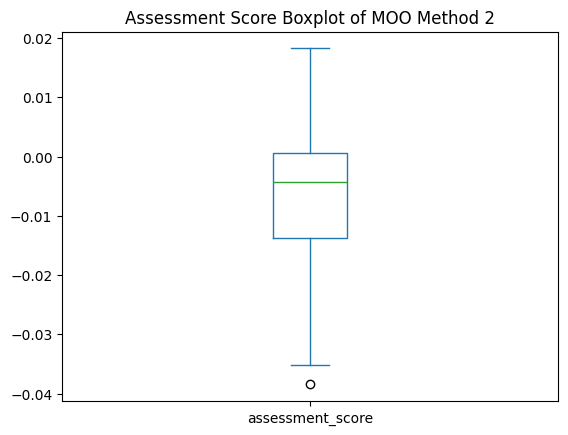

In [76]:
assessment_score_5_0_05 = res5_0_05["assessment_score"].explode().reset_index(drop=True)
assessment_score_5_0_05.plot(kind='box')
plt.title('Assessment Score Boxplot of MOO Method 2')
plt.show()

# 4. Set for Gap 25%

## 4.1. Data Define

In [77]:
data_result_0_25 = {1: data_path[0.25] + "result_1.csv",
                     2: data_path[0.25] + "result_2.csv",
                     3: data_path[0.25] + "result_3.csv",
                     4: data_path[0.25] + "result_5_MOO_2.csv",}

## 4.2. Objective 1 Result

In [78]:
# Set display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

res1_0_25 = pd.read_csv(data_result_0_25[1])
res1_0_25.set_index("employee")
res1_0_25.head()

,employee,company,assigned_task,sum_sp,wasted_sp,assessment_score
0,Talent 1,"['P4', 'P4']","['T101', 'T199']",11,9,"[-0.02926093514328809, -0.02909890109890109]"
1,Talent 2,['P4'],['T240'],2,18,[-0.019185520361990952]
2,Talent 3,['P2'],['T177'],3,17,[-0.019134615384615382]
3,Talent 4,['P3'],['T228'],1,19,[-0.01656108597285068]
4,Talent 5,"['P1', 'P1', 'P1']","['T21', 'T174', 'T239']",13,7,"[-0.029755872869645334, -0.03243744207599629, ..."


In [79]:
# Convert the string representations of lists to actual lists of numbers
res1_0_25["assessment_score"] = res1_0_25["assessment_score"].apply(
    lambda x: ast.literal_eval(x)
)

In [80]:
# statistics of the objective

total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in res1_0_25["employee"]))
total_active_sp = sum(value for value in res1_0_25["sum_sp"])
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 109
Total Active Employee		: 109	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



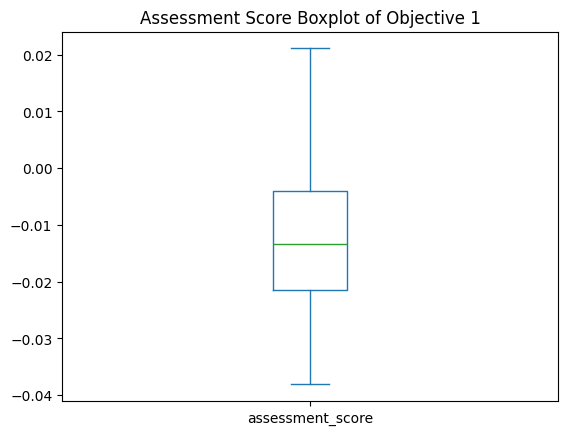

In [81]:
assessment_score_1_0_25 = res1_0_25["assessment_score"].explode().reset_index(drop=True)
assessment_score_1_0_25.plot(kind='box')
plt.title('Assessment Score Boxplot of Objective 1')
plt.show()

## 4.3. Objective 2 Result

In [82]:
# Set display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

res2_0_25 = pd.read_csv(data_result_0_025[2])
res2_0_25.set_index("employee")
res2_0_25.head()

,employee,company,assigned_task,sum_sp,wasted_sp,assessment_score
0,Talent 6,"['P3', 'P3']","['T93', 'T116']",16,4,"[-0.013510848126232742, -0.015484515484515482]"
1,Talent 7,"['P4', 'P4', 'P4', 'P4', 'P4', 'P4', 'P4', 'P4']","['T106', 'T124', 'T151', 'T196', 'T199', 'T240...",20,0,"[0.002210433244916002, 0.00028490028490028103,..."
2,Talent 8,"['P2', 'P2', 'P2', 'P2']","['T67', 'T170', 'T177', 'T291']",20,0,"[0.00909090909090909, 0.010227761065749887, 0...."
3,Talent 10,"['P2', 'P2', 'P2', 'P2', 'P2', 'P2', 'P2']","['T47', 'T200', 'T205', 'T249', 'T259', 'T260'...",20,0,"[0.008938547486033517, 0.012787212787212785, 0..."
4,Talent 11,"['P5', 'P5', 'P5', 'P5']","['T18', 'T72', 'T110', 'T153']",20,0,"[-0.001075847229693383, -0.0024975024975024992..."


In [83]:
# Convert the string representations of lists to actual lists of numbers
res2_0_25["assessment_score"] = res2_0_25["assessment_score"].apply(
    lambda x: ast.literal_eval(x)
)

In [84]:
# statistics of the objective

total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in res2_0_25["employee"]))
total_active_sp = sum(value for value in res2_0_25["sum_sp"])
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 109
Total Active Employee		: 64	58.72%
Total Idle Employee		: 45	41.28%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



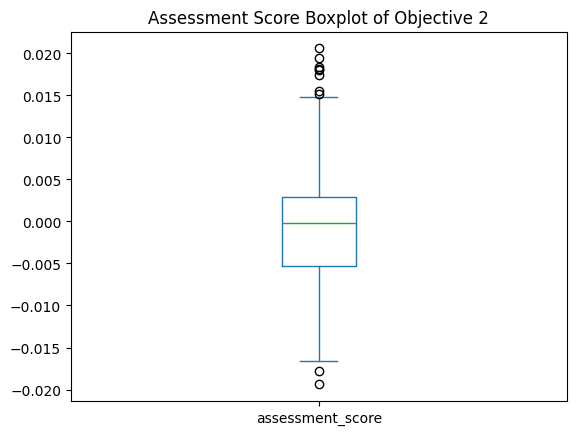

In [85]:
assessment_score_2_0_25 = res2_0_25["assessment_score"].explode().reset_index(drop=True)
assessment_score_2_0_25.plot(kind='box')
plt.title('Assessment Score Boxplot of Objective 2')
plt.show()

## 4.4. Objective 3 Result

In [86]:
# Set display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

res3_0_25 = pd.read_csv(data_result_0_25[3])
res3_0_25.set_index("employee")
res3_0_25.head()

,employee,company,assigned_task,sum_sp,wasted_sp,assessment_score
0,Talent 1,"['P1', 'P1', 'P1', 'P1']","['T75', 'T107', 'T129', 'T239']",11,9,"[-0.027204502814258923, -0.03049613108784706, ..."
1,Talent 2,"['P3', 'P3']","['T92', 'T182']",10,10,"[-0.01748633879781421, -0.016575682382134]"
2,Talent 3,"['P1', 'P1']","['T87', 'T275']",11,9,"[-0.015097945532728143, -0.01630584983878397]"
3,Talent 4,"['P3', 'P3']","['T97', 'T158']",10,10,"[-0.01692307692307692, -0.010063620589936376]"
4,Talent 5,['P1'],['T21'],8,12,[-0.029755872869645334]


In [87]:
# Convert the string representations of lists to actual lists of numbers
res3_0_25["assessment_score"] = res3_0_25["assessment_score"].apply(
    lambda x: ast.literal_eval(x)
)

In [88]:
# statistics of the objective

total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in res3_0_25["employee"]))
total_active_sp = sum(value for value in res3_0_25["sum_sp"])
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 109
Total Active Employee		: 109	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



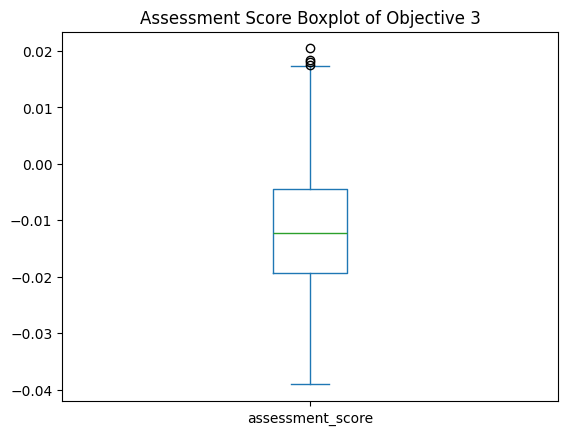

In [89]:
assessment_score_3_0_25 = res3_0_25["assessment_score"].explode().reset_index(drop=True)
assessment_score_3_0_25.plot(kind='box')
plt.title('Assessment Score Boxplot of Objective 3')
plt.show()

## 4.5. MOO Result (Method 2)

In [90]:
# Set display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

res5_0_25 = pd.read_csv(data_result_0_25[4])
res5_0_25.set_index("employee")
res5_0_25.head()

,employee,company,assigned_task,sum_sp,wasted_sp,assessment_score
0,Talent 1,"['P3', 'P3']","['T158', 'T270']",10,10,"[-0.024291497975708495, -0.027166504381694268]"
1,Talent 2,"['P3', 'P3']","['T97', 'T166']",11,9,"[-0.017692307692307688, -0.017582417582417582]"
2,Talent 3,"['P2', 'P2', 'P2']","['T19', 'T200', 'T297']",11,9,"[-0.012681912681912683, -0.018781218781218776,..."
3,Talent 4,"['P5', 'P5']","['T83', 'T193']",11,9,"[-0.017013574660633492, -0.016894761680037746]"
4,Talent 5,['P4'],['T39'],8,12,[-0.029608127721335267]


In [91]:
# Convert the string representations of lists to actual lists of numbers
res5_0_25["assessment_score"] = res5_0_25["assessment_score"].apply(
    lambda x: ast.literal_eval(x)
)

In [92]:
# statistics of the objective

total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in res5_0_25["employee"]))
total_active_sp = sum(value for value in res5_0_25["sum_sp"])
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 109
Total Active Employee		: 109	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



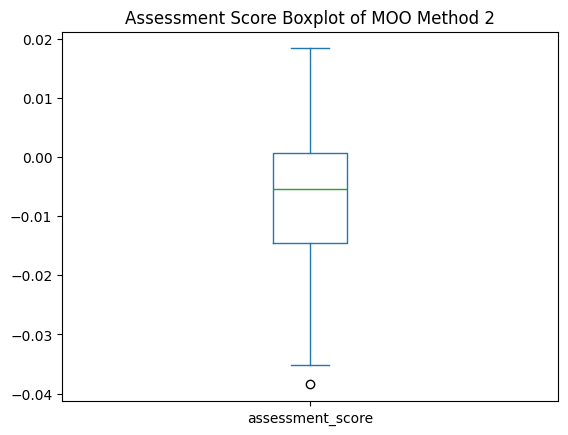

In [93]:
assessment_score_5_0_25 = res5_0_25["assessment_score"].explode().reset_index(drop=True)
assessment_score_5_0_25.plot(kind='box')
plt.title('Assessment Score Boxplot of MOO Method 2')
plt.show()

# 5. Overall Comparison

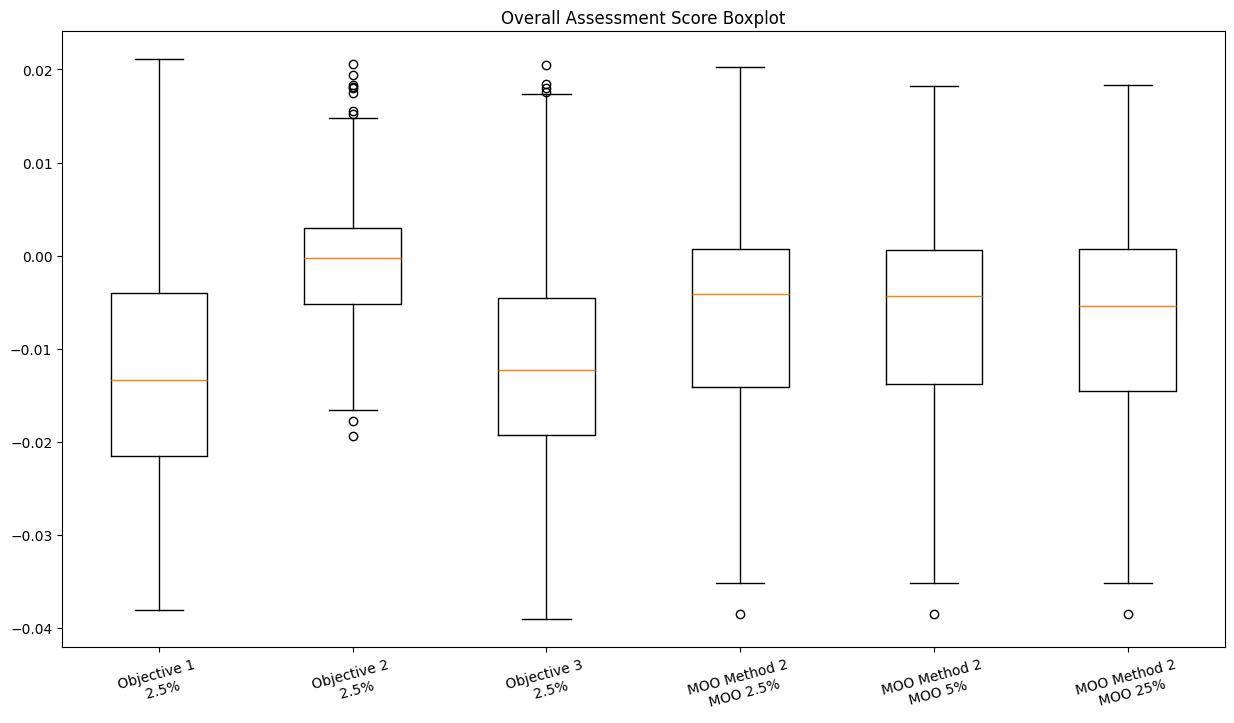

In [94]:
# merge all boxplot in one graph
data = [
    assessment_score_1_0_025,
    assessment_score_2_0_025,
    assessment_score_3_0_025,
    assessment_score_5_0_025,
    assessment_score_5_0_05,
    assessment_score_5_0_25
]

plt.figure(figsize=(15, 8))

plt.boxplot(
	data,

	labels=[
		"Objective 1\n 2.5%",
		"Objective 2\n 2.5%",
		"Objective 3\n 2.5%",
		"MOO Method 2\n MOO 2.5%",
		"MOO Method 2\n MOO 5%",
        "MOO Method 2\n MOO 25%"
	],

)

plt.title("Overall Assessment Score Boxplot")

plt.xticks(rotation=15)

plt.show()

### Notes: The result in Gap 25% MOO different than Gap 2.5% and 5%